In [47]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance

from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [48]:
num_qubits = 4


In [49]:
from qiskit_optimization.applications import Maxcut, Tsp

In [25]:
n = 5
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)

In [26]:
import networkx as nx
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

distance
 [[ 0. 48. 91. 33. 85.]
 [48.  0. 63. 71. 93.]
 [91. 63.  0. 92. 65.]
 [33. 71. 92.  0. 62.]
 [85. 93. 65. 62.  0.]]


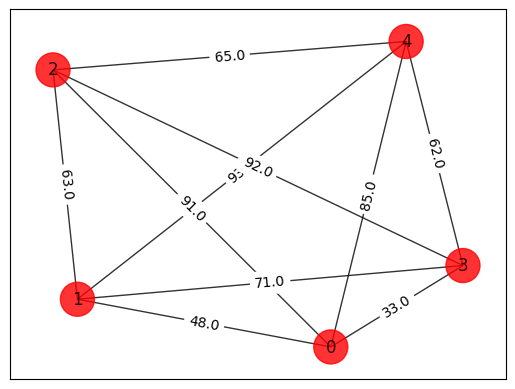

In [27]:

dj_matrix = nx.to_numpy_array(tsp.graph)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

order = (0, 1, 2, 3, 4) Distance = 350.0
order = (0, 1, 2, 4, 3) Distance = 271.0
Best order from brute force = (0, 1, 2, 4, 3) with total distance = 271.0


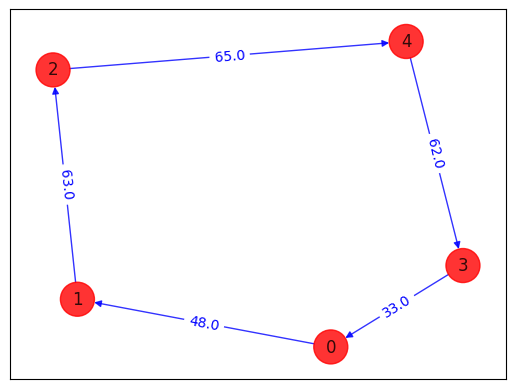

In [28]:
from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order


best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)


def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [50]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())


Problem name: TSP

Minimize
  48*x_0_0*x_1_1 + 48*x_0_0*x_1_4 + 91*x_0_0*x_2_1 + 91*x_0_0*x_2_4
  + 33*x_0_0*x_3_1 + 33*x_0_0*x_3_4 + 85*x_0_0*x_4_1 + 85*x_0_0*x_4_4
  + 48*x_0_1*x_1_0 + 48*x_0_1*x_1_2 + 91*x_0_1*x_2_0 + 91*x_0_1*x_2_2
  + 33*x_0_1*x_3_0 + 33*x_0_1*x_3_2 + 85*x_0_1*x_4_0 + 85*x_0_1*x_4_2
  + 48*x_0_2*x_1_1 + 48*x_0_2*x_1_3 + 91*x_0_2*x_2_1 + 91*x_0_2*x_2_3
  + 33*x_0_2*x_3_1 + 33*x_0_2*x_3_3 + 85*x_0_2*x_4_1 + 85*x_0_2*x_4_3
  + 48*x_0_3*x_1_2 + 48*x_0_3*x_1_4 + 91*x_0_3*x_2_2 + 91*x_0_3*x_2_4
  + 33*x_0_3*x_3_2 + 33*x_0_3*x_3_4 + 85*x_0_3*x_4_2 + 85*x_0_3*x_4_4
  + 48*x_0_4*x_1_0 + 48*x_0_4*x_1_3 + 91*x_0_4*x_2_0 + 91*x_0_4*x_2_3
  + 33*x_0_4*x_3_0 + 33*x_0_4*x_3_3 + 85*x_0_4*x_4_0 + 85*x_0_4*x_4_3
  + 63*x_1_0*x_2_1 + 63*x_1_0*x_2_4 + 71*x_1_0*x_3_1 + 71*x_1_0*x_3_4
  + 93*x_1_0*x_4_1 + 93*x_1_0*x_4_4 + 63*x_1_1*x_2_0 + 63*x_1_1*x_2_2
  + 71*x_1_1*x_3_0 + 71*x_1_1*x_3_2 + 93*x_1_1*x_4_0 + 93*x_1_1*x_4_2
  + 63*x_1_2*x_2_1 + 63*x_1_2*x_2_3 + 71*x_1_2*x_3_1 + 71*x_1_2*

In [62]:
%%time
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 247842.5
Ising Hamiltonian:
-21221.5 * IIIIIIIIIIIIIIIIIIIIIIIIZ
- 21221.5 * IIIIIIIIIIIIIIIIIIIIIIIZI
- 21221.5 * IIIIIIIIIIIIIIIIIIIIIIZII
- 21221.5 * IIIIIIIIIIIIIIIIIIIIIZIII
- 21221.5 * IIIIIIIIIIIIIIIIIIIIZIIII
- 21230.5 * IIIIIIIIIIIIIIIIIIIZIIIII
- 21230.5 * IIIIIIIIIIIIIIIIIIZIIIIII
- 21230.5 * IIIIIIIIIIIIIIIIIZIIIIIII
- 21230.5 * IIIIIIIIIIIIIIIIZIIIIIIII
- 21230.5 * IIIIIIIIIIIIIIIZIIIIIIIII
- 21248.5 * IIIIIIIIIIIIIIZIIIIIIIIII
- 21248.5 * IIIIIIIIIIIIIZIIIIIIIIIII
- 21248.5 * IIIIIIIIIIIIZIIIIIIIIIIII
- 21248.5 * IIIIIIIIIIIZIIIIIIIIIIIII
- 21248.5 * IIIIIIIIIIZIIIIIIIIIIIIII
- 21222.0 * IIIIIIIIIZIIIIIIIIIIIIIII
- 21222.0 * IIIIIIIIZIIIIIIIIIIIIIIII
- 21222.0 * IIIIIIIZIIIIIIIIIIIIIIIII
- 21222.0 * IIIIIIZIIIIIIIIIIIIIIIIII
- 21222.0 * IIIIIZIIIIIIIIIIIIIIIIIII
- 21245.5 * IIIIZIIIIIIIIIIIIIIIIIIII
- 21245.5 * IIIZIIIIIIIIIIIIIIIIIIIII
- 21245.5 * IIZIIIIIIIIIIIIIIIIIIIIII
- 21245.5 * IZIIIIIIIIIIIIIIIIIIIIIII
- 21245.5 * ZIIIIIIIIIIIIIIIIIIIIIIII
+ 3515.5 * IIII